In [14]:
#### IMPORTS ####
using ProgressMeter
using Plots, Measures
using LaTeXStrings
using NPZ
theme(:default)
include("multiOrbKondoRGFlow.jl")

getInStateScattFlow (generic function with 2 methods)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:27
Progress: 100%|█████████████████████████████████████████| Time: 0:02:31
Progress: 100%|█████████████████████████████████████████| Time: 0:02:26
Progress: 100%|█████████████████████████████████████████| Time: 0:02:22


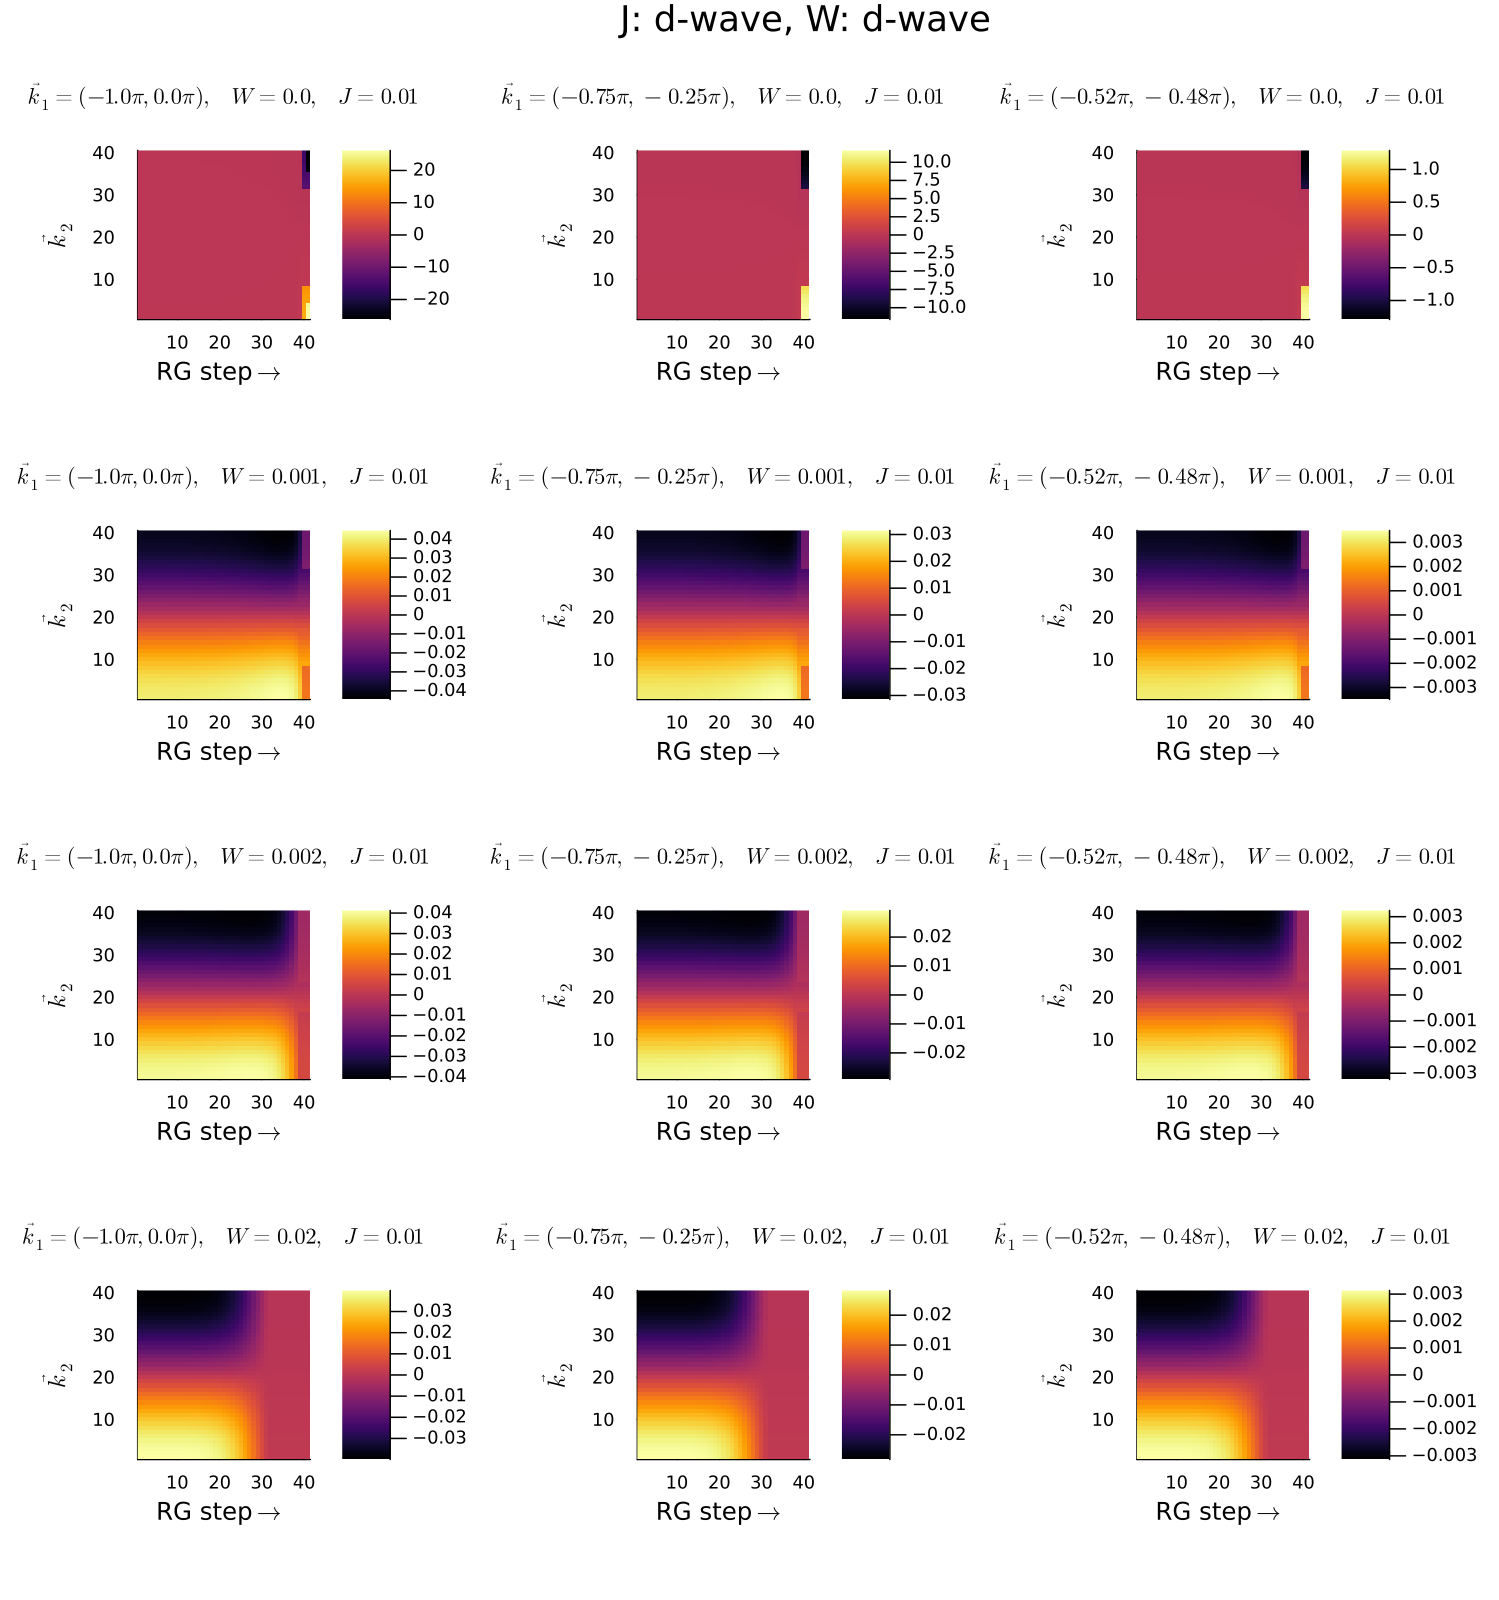

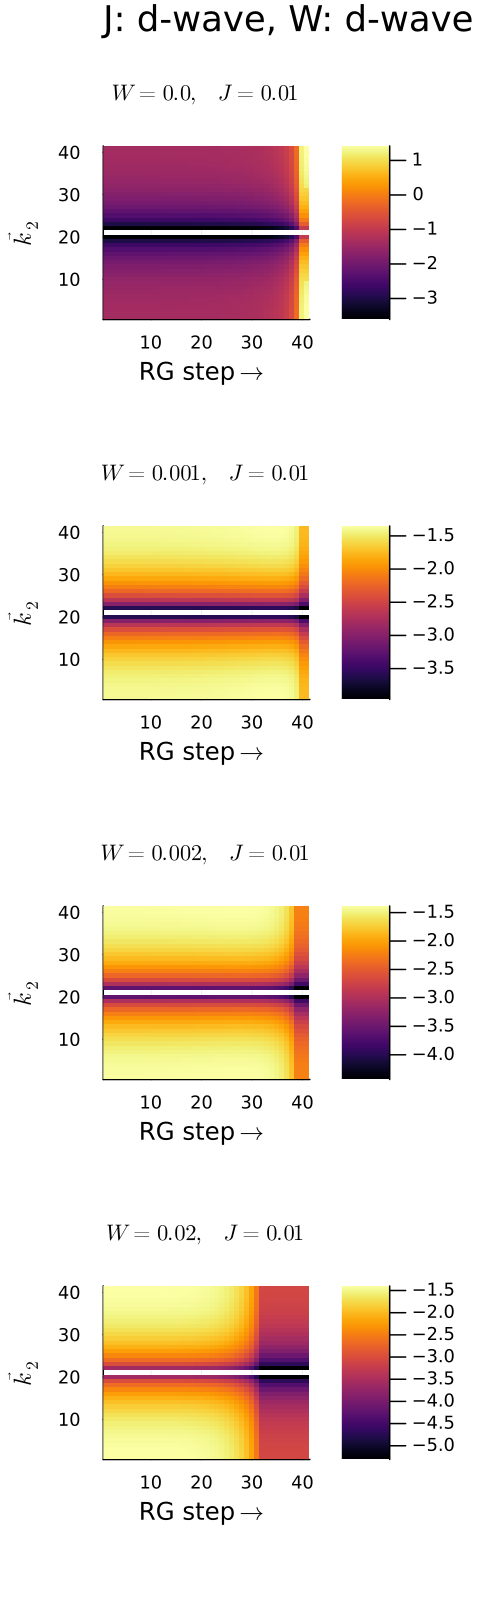

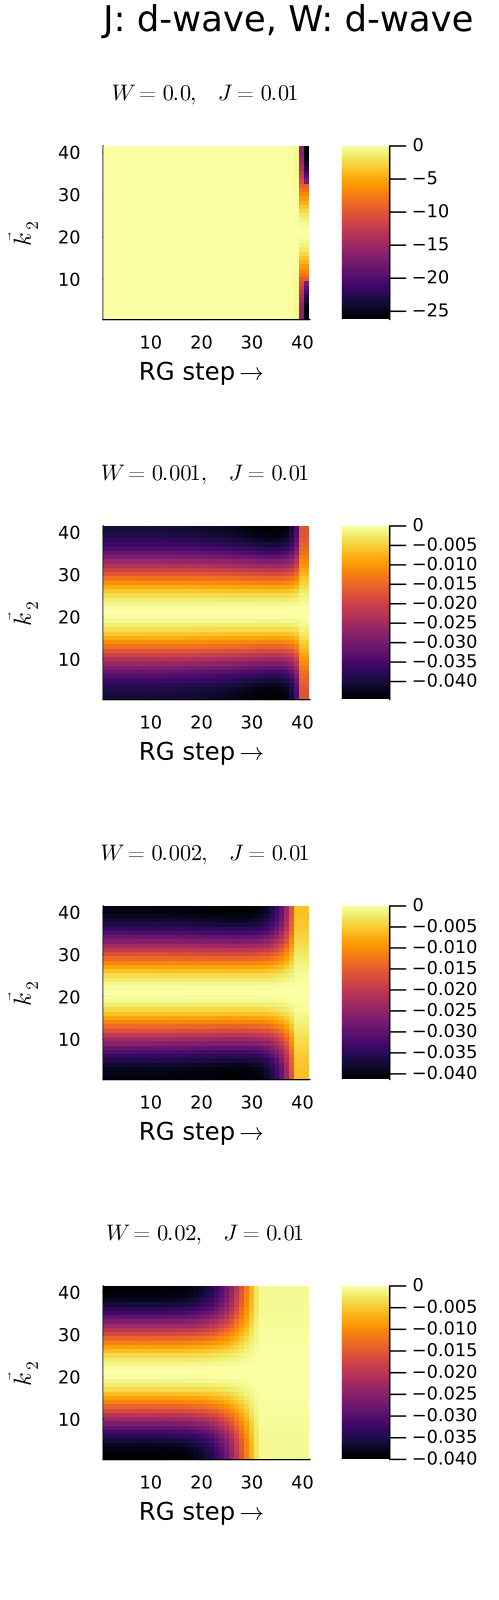

Progress: 100%|█████████████████████████████████████████| Time: 0:02:31
Progress: 100%|█████████████████████████████████████████| Time: 0:02:30
Progress: 100%|█████████████████████████████████████████| Time: 0:02:28
Progress: 100%|█████████████████████████████████████████| Time: 0:02:28


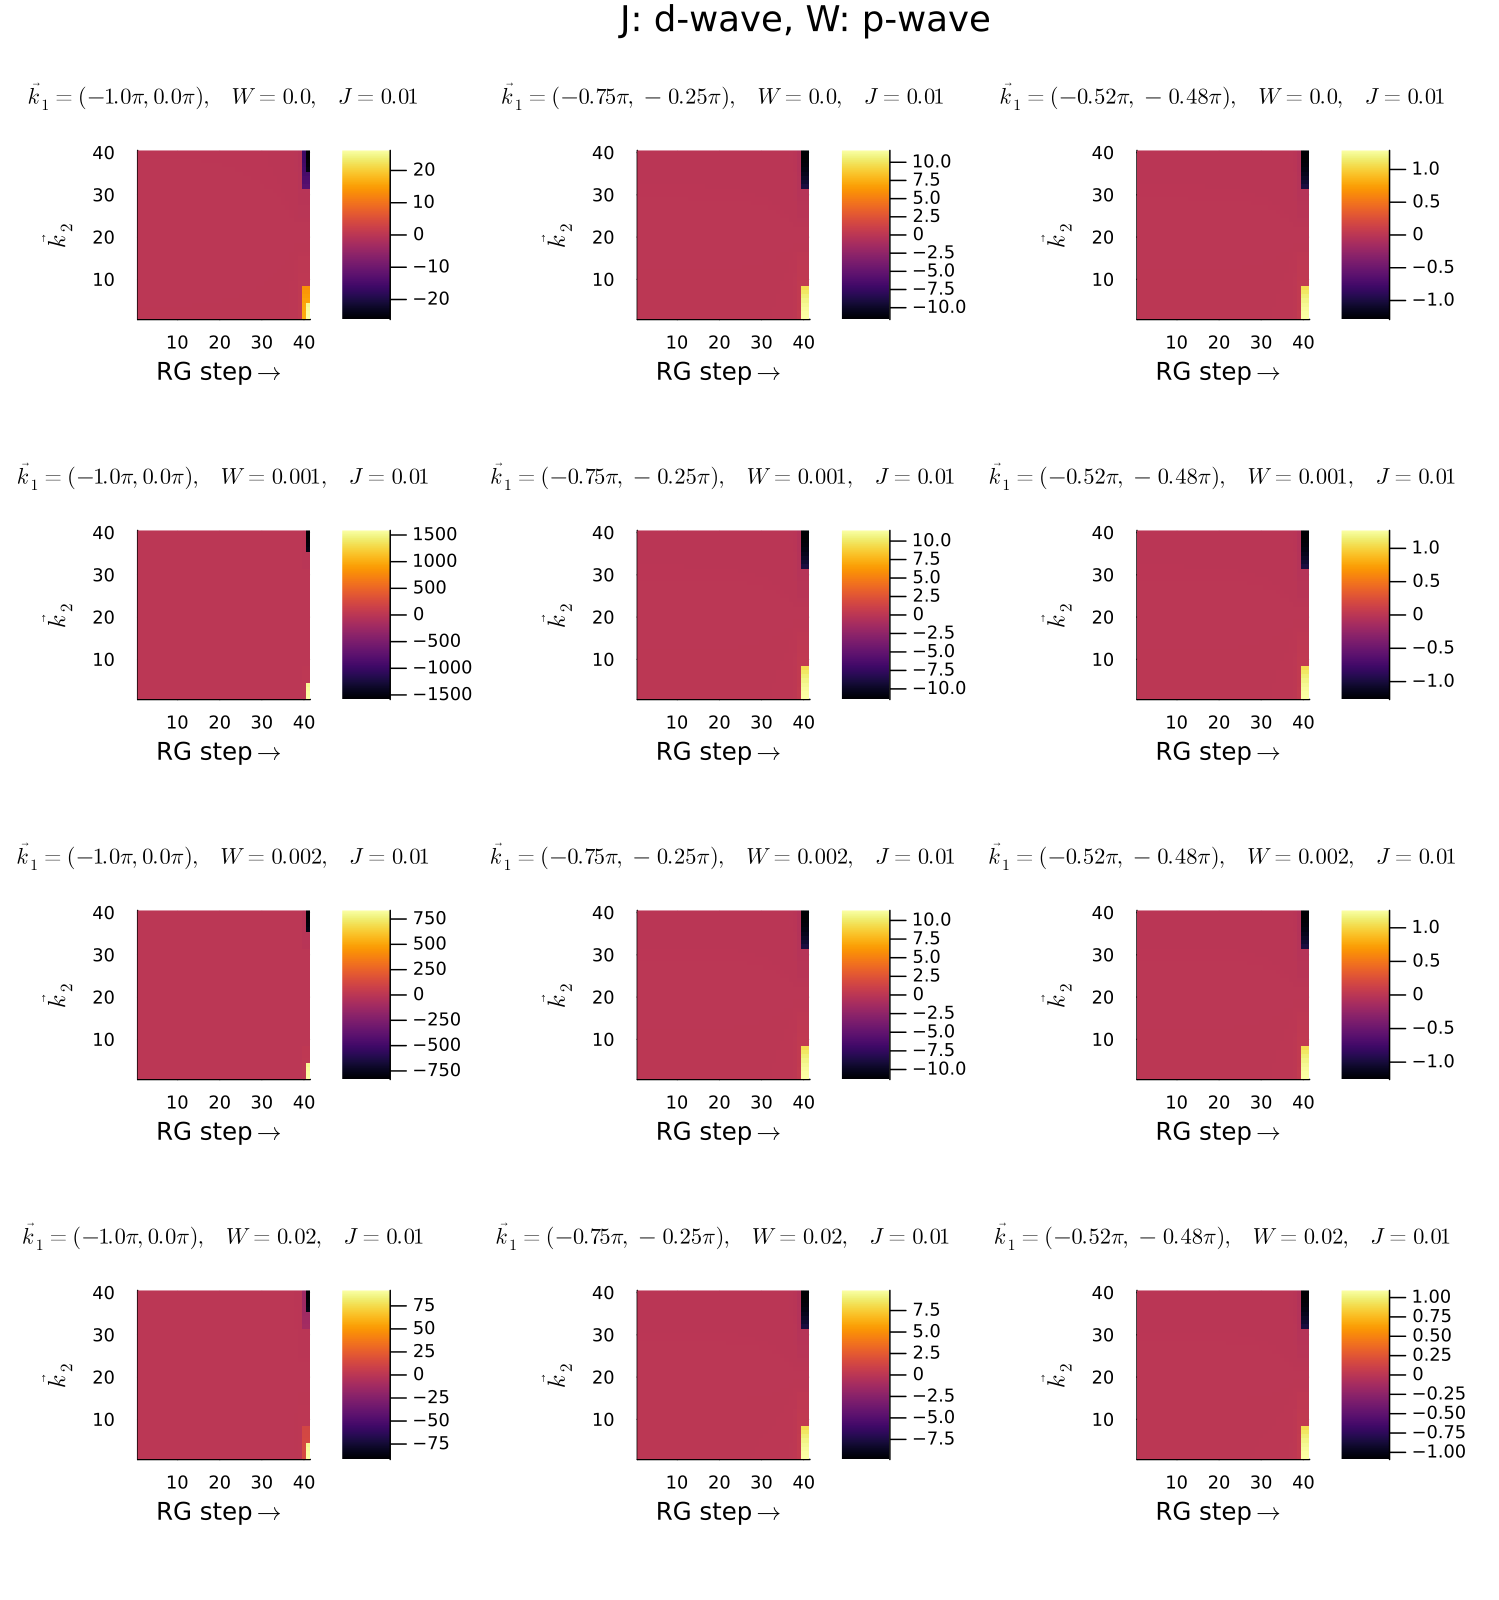

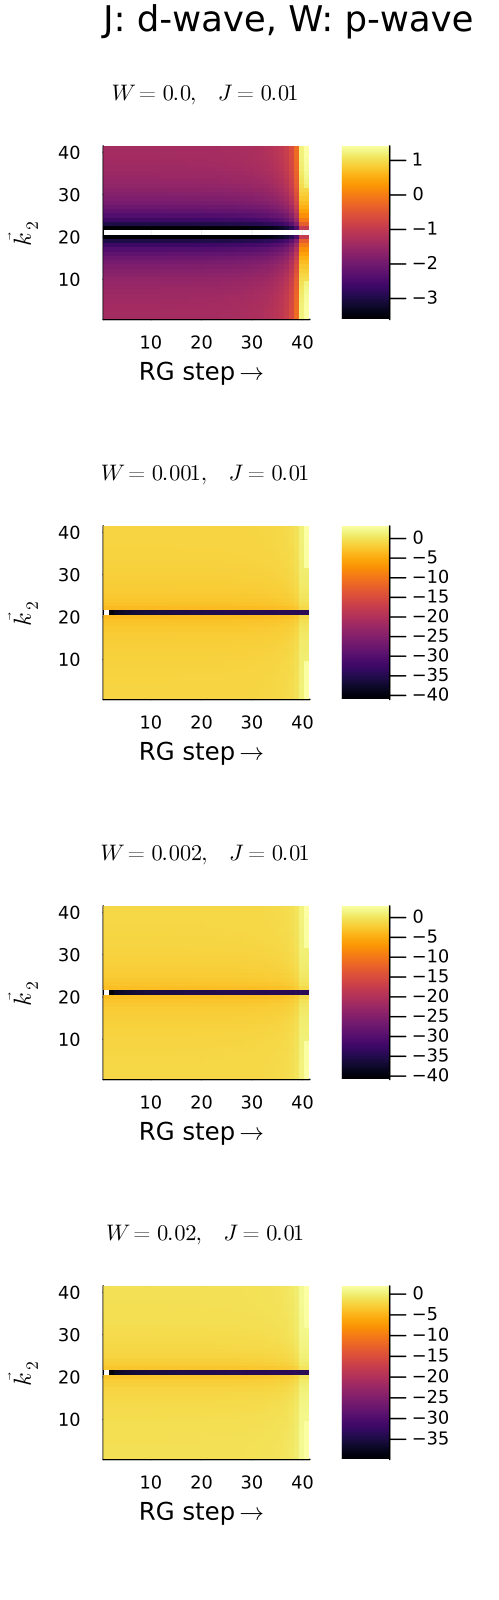

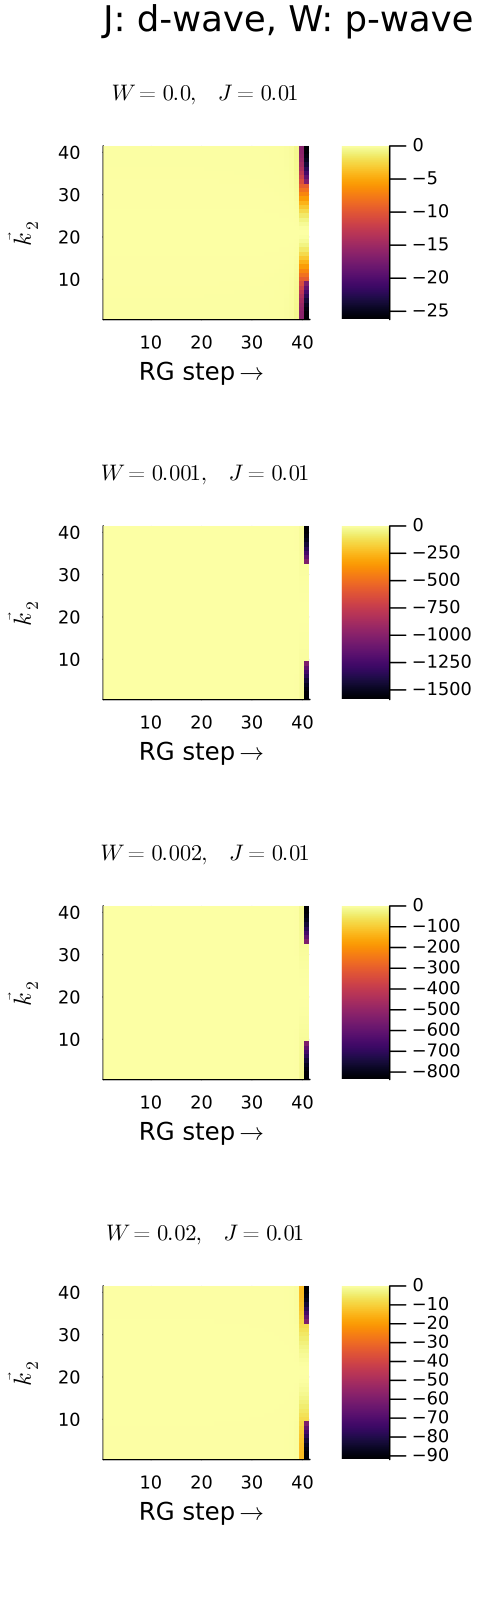

In [26]:
function getRgFlow(num_kspace_half, J_val, W_by_J_val_range)
    W_val_range = J_val .* W_by_J_val_range
    for orbs in ["dd", "dp"]
        allplots_forw=[]
        allplots_FS=[]
        allplots_back=[]
        for (j, W_val) in collect(enumerate(W_val_range))
            kondoJArray, dispersionArray = multiOrbKondoRGFlow(num_kspace_half, 1.0, J_val, -W_val, orbs)
            results, k_vals = getForwardScattFlow(kondoJArray, num_kspace_half)
            for (result, k_val) in zip(eachslice(results; dims=1), k_vals)
                push!(allplots_forw, heatmap(result, title="\$\\vec k_1=($(k_val[1])\\pi, $(k_val[2])\\pi), \\quad W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2))\$"))
            end
            results = getInStateScattFlow(kondoJArray, num_kspace_half)
            push!(allplots_FS, heatmap(log10.(abs.(results)), title="\$W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2))\$"))
            results = getBackScattFlow(kondoJArray, num_kspace_half)
            push!(allplots_back, heatmap(results, title="\$W=$(round(W_val, digits=3)), \\quad J=$(round(J_val, digits=2))\$"))
        end
        for (plot_arr, name) in zip([allplots_forw, allplots_FS, allplots_back], ["forw", "onsite", "back"])
            num_columns = div(length(plot_arr), length(W_val_range))
            globalplot = plot(plot_arr..., layout=(length(W_val_range), num_columns), 
                size=(500*num_columns, 400*length(W_val_range)), 
                titlefontsize=10, topmargin=2mm, bottommargin=4mm, leftmargin=3mm, rightmargin=3mm,
                thickness_scaling=1.5, xlabel="RG step\$\\rightarrow\$", ylabel="\$\\vec k_2\$", 
                plot_title="J: $(orbs[1])-wave, W: $(orbs[2])-wave")
            display(globalplot)
            savefig(globalplot, "fig$(name)_$(orbs).pdf")
        end
    end
end

getRgFlow(40, 0.01, [0, 0.13, 0.2, 2])